In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use("ggplot")
#plt.rc('font', family='NanumGothic')

# 한글 폰트 설정
#rc('font', family='Malgun Gothic')

pd.set_option("display.max_columns", None)

In [2]:
customer = pd.read_csv('customers.csv')
#location = pd.read_csv('locations.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
product = pd.read_csv('products.csv')
review = pd.read_csv('reviews.csv')
seller = pd.read_csv('sellers.csv')

In [3]:
cancel_id = []
for cancel in orders[orders["Order_status"]=="canceled"]["Order_id"]:
  cancel_id.append(cancel)

In [4]:
cancel_id

['ORDER_02596',
 'ORDER_07781',
 'ORDER_51548',
 'ORDER_52492',
 'ORDER_82044',
 'ORDER_83608']

In [5]:
orders = orders[orders["Order_status"]!="canceled"]

In [6]:
order_items = order_items[~order_items["Order_id"].isin(cancel_id)]

### 카테고리별 판매량 수

In [7]:
order_product = pd.merge(order_items, product, how="left", on="Product_id")
order_product = order_product[["Order_id","Product_category_name", "Price"]]
order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [8]:
category = order_product.groupby("Product_category_name")["Price"].agg(["count","sum"]).sort_values("count", ascending=False).reset_index()
category

,Product_category_name,count,sum
0,bed_bath_table,10094,943580.26
1,health_beauty,8376,1073200.56
2,sports_leisure,7798,887762.67
3,furniture_decor,7558,651751.40
4,computers_accessories,7075,832695.93
...,...,...,...
67,musical_cds_dvds,14,730.00
68,the_kitchen,14,2054.99
69,arts_and_crafts,11,645.06
70,fashion_childrens_clothes,7,519.95


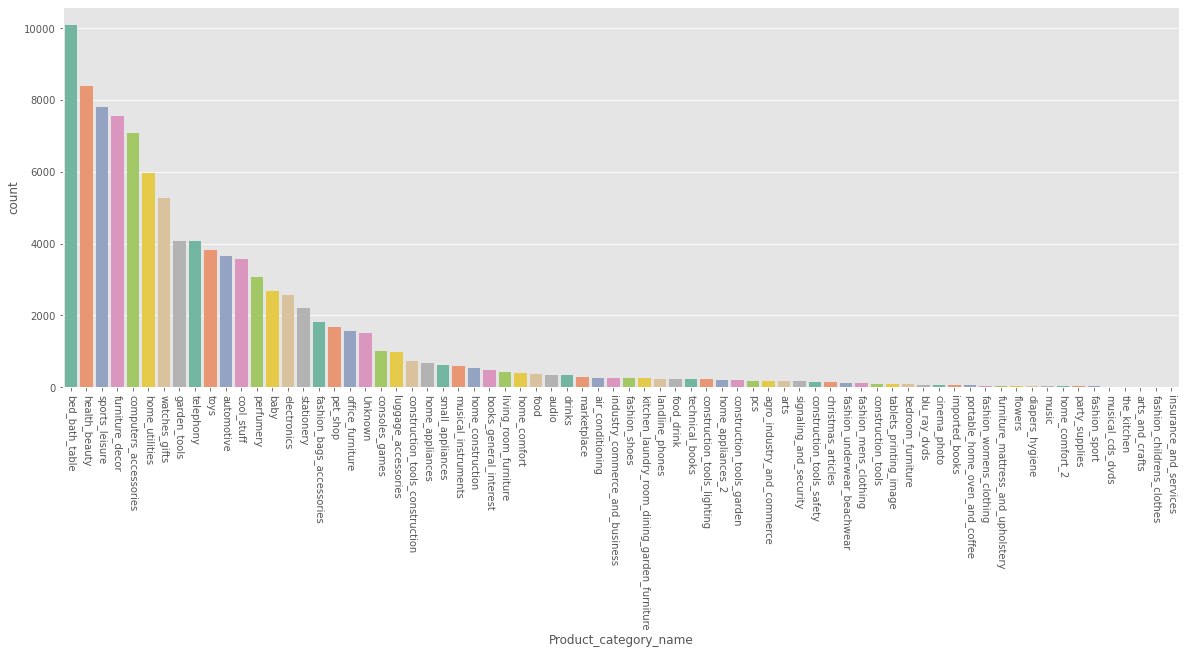

In [12]:
plt.figure(figsize=(20,7))
sns.barplot(data=category, x="Product_category_name", y="count", palette="Set2")
plt.xticks(rotation=270)
plt.show()


### 카테고리별 주문 건수

In [13]:
order_product = pd.merge(order_items, product, how="left", on="Product_id")
order_product = order_product[["Order_id","Product_category_name", "Price"]]
unique_order_product = order_product.drop_duplicates("Order_id")
unique_order_product

,Order_id,Product_category_name,Price
0,ORDER_75477,cool_stuff,58.90
1,ORDER_63604,pet_shop,239.90
2,ORDER_05566,furniture_decor,199.00
3,ORDER_04632,garden_tools,199.90
4,ORDER_61452,home_utilities,21.90
...,...,...,...
100545,ORDER_70405,home_utilities,299.99
100546,ORDER_62069,computers_accessories,350.00
100547,ORDER_46632,sports_leisure,99.90
100548,ORDER_52966,computers_accessories,55.99


In [14]:
unique_order_cat = unique_order_product.groupby("Product_category_name")["Price"].agg(["count","sum"]).sort_values("count", ascending=False).reset_index()
unique_order_cat

,Product_category_name,count,sum
0,bed_bath_table,8457,815293.55
1,health_beauty,7613,1017295.66
2,sports_leisure,6926,818737.07
3,computers_accessories,5988,708153.36
4,furniture_decor,5757,536433.21
...,...,...,...
67,musical_cds_dvds,12,640.00
68,the_kitchen,12,1890.99
69,arts_and_crafts,9,583.17
70,fashion_childrens_clothes,7,519.95


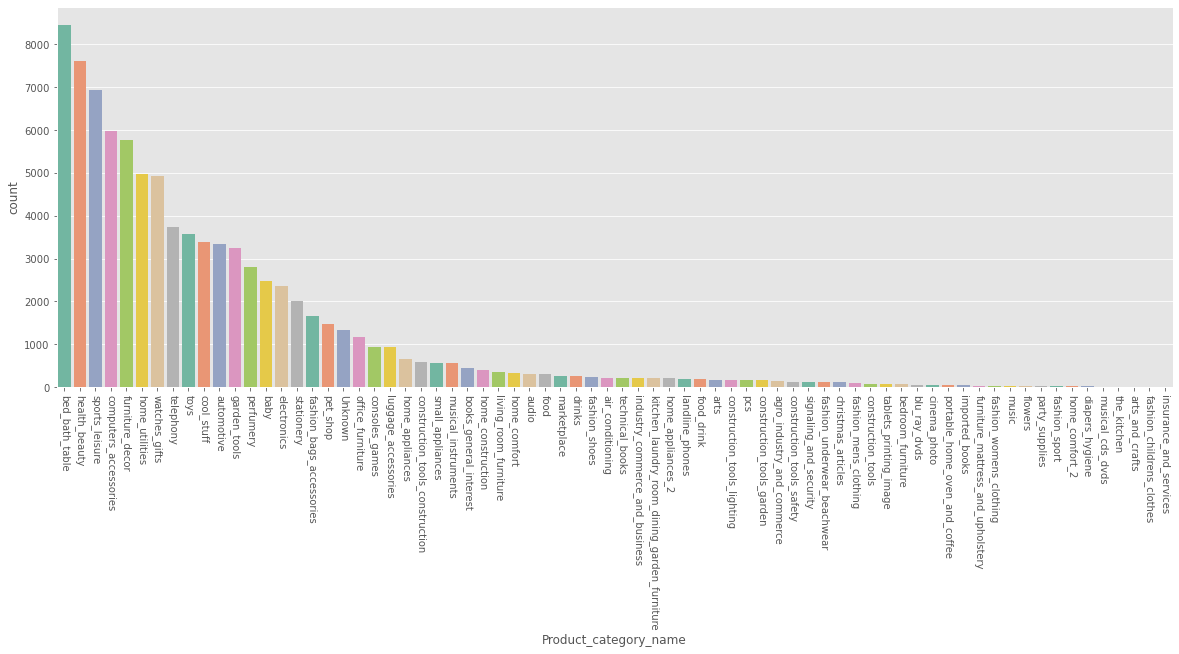

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(data=unique_order_cat,x="Product_category_name", y="count", palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 주문 건수와 매출액


In [17]:
orders["Purchase_year_month"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%Y-%m")
orders["Purchase_year_month_day"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%Y-%m-%d")
orders["Purchase_month"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.strftime("%m")
orders["purchase_day"] = pd.to_datetime(orders["Order_purchase_timestamp"]).dt.day_name()
order_price_sum = order_items.groupby("Order_id")["Price"].agg(["sum"]).reset_index()
orders = pd.merge(order_price_sum, orders, on="Order_id", how="left")
orders

,Order_id,sum,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Purchase_year_month,Purchase_year_month_day,Purchase_month,purchase_day
0,ORDER_00000,29.99,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2018-10,2018-10-02,10,Tuesday
1,ORDER_00001,45.00,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,2018-11,2018-11-18,11,Sunday
2,ORDER_00002,19.90,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2019-02,2019-02-13,02,Wednesday
3,ORDER_00003,147.90,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,2018-07,2018-07-09,07,Monday
4,ORDER_00004,59.99,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,2018-05,2018-05-16,05,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
87943,ORDER_88083,72.00,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,2018-03,2018-03-09,03,Friday
87944,ORDER_88084,174.90,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,2019-02,2019-02-06,02,Wednesday
87945,ORDER_88085,205.99,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,2018-08,2018-08-27,08,Monday
87946,ORDER_88086,359.98,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,2019-01,2019-01-08,01,Tuesday


#### 년-월 주문 건수와 판매액

In [18]:
orders.groupby("Purchase_year_month")["Order_id"].count().sort_values(ascending=False)

Purchase_year_month
2018-11    7288
2019-01    7069
2019-03    7003
2019-04    6790
2019-05    6717
2019-02    6554
2019-06    6024
2018-12    5513
2018-10    4478
2018-08    4191
2018-09    4149
2019-07    4137
2018-07    3861
2018-05    3544
2018-06    3134
2018-03    2545
2018-04    2303
2018-02    1639
2018-01     747
2017-10     261
2017-12       1
Name: Order_id, dtype: int64

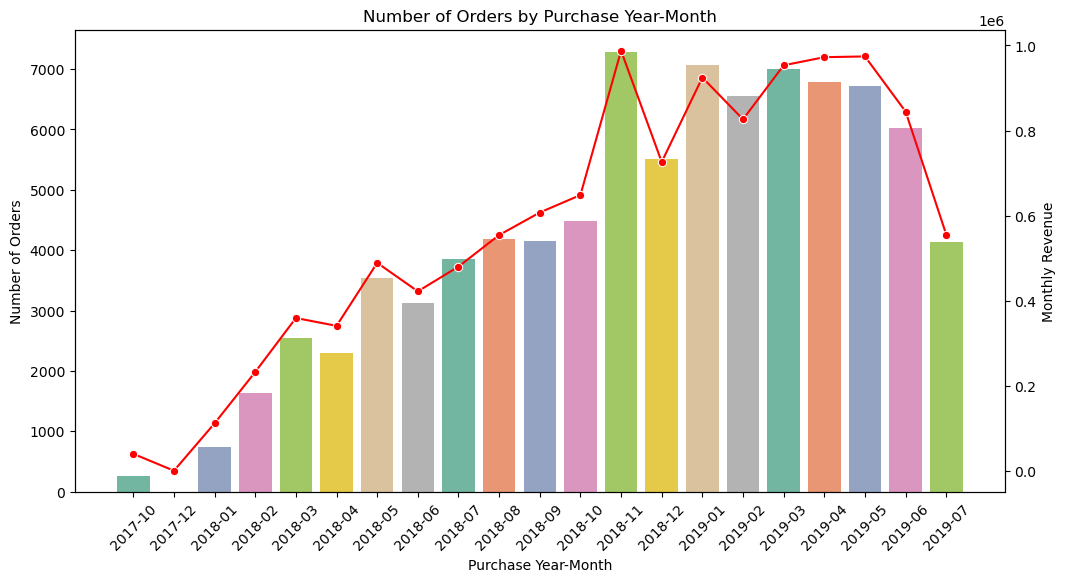

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주문 수를 월별로 정렬
order_counts = orders.groupby("Purchase_year_month")["Order_id"].count()

# 각 월별 주문 금액 계산
monthly_revenue = orders.groupby("Purchase_year_month")["sum"].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=order_counts.index, y=order_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Purchase Year-Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Purchase Year-Month")

# 각 월별 주문 금액을 나타내는 선 그래프 추가
ax2 = ax.twinx()
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Monthly Revenue")

plt.show()


#### 년-월-일 주문 건수

In [30]:
orders.groupby("Purchase_year_month_day")["Order_id"].count().sort_values(ascending=False)

Purchase_year_month_day
2018-11-24    1147
2018-11-25     487
2018-11-27     395
2018-11-26     382
2018-11-28     371
              ... 
2018-01-09       5
2018-01-08       4
2018-01-07       4
2018-01-06       4
2017-12-23       1
Name: Order_id, Length: 581, dtype: int64

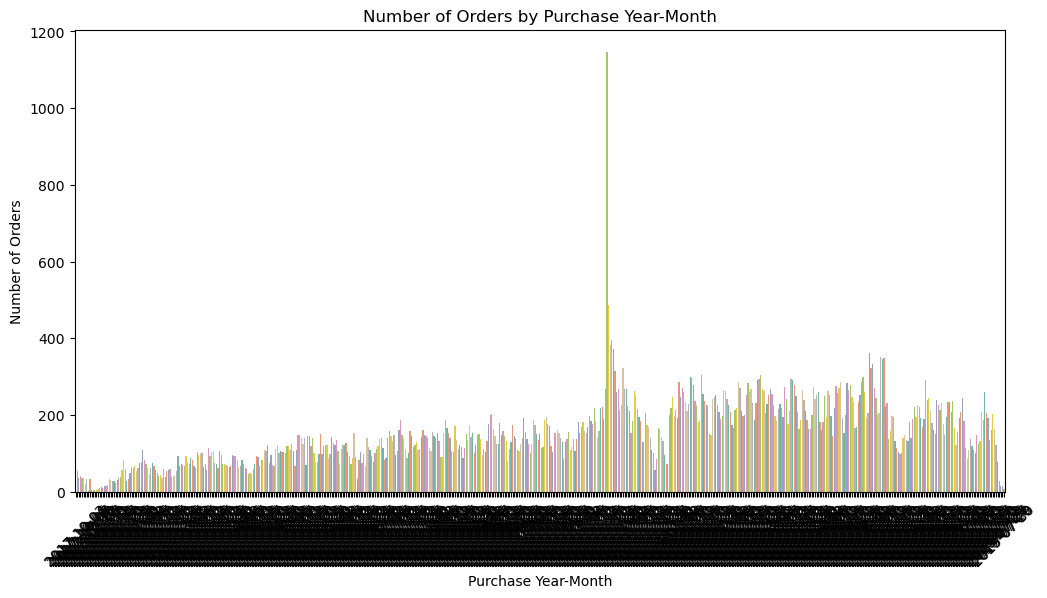

In [32]:
# 주문 수를 월별로 정렬
order_counts = orders.groupby("Purchase_year_month_day")["Order_id"].count()

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Purchase Year-Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Purchase Year-Month")
plt.show()


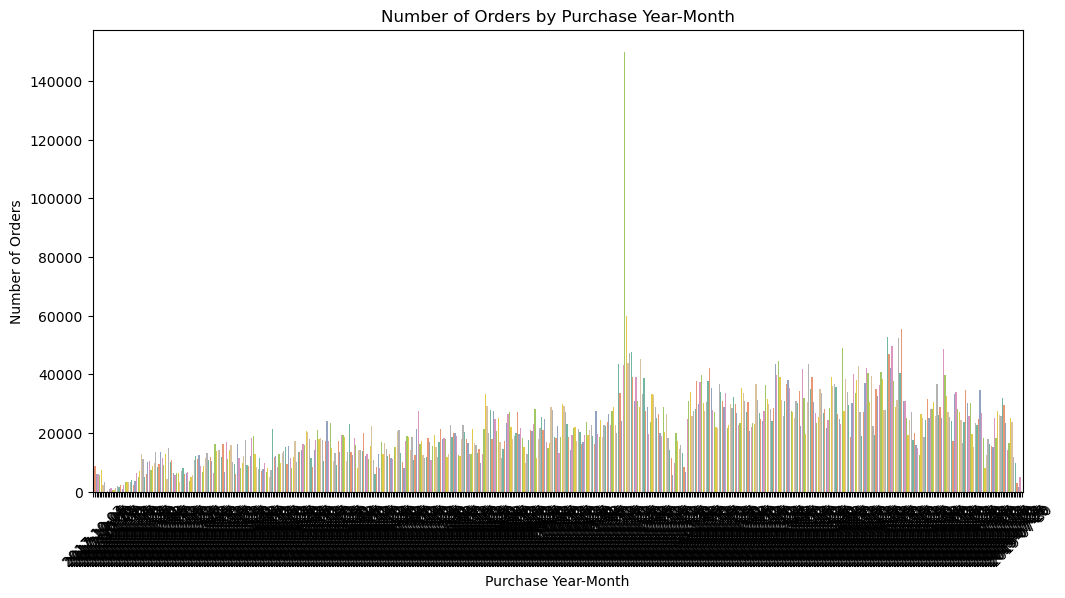

In [34]:
# # 매출액
# plt.style.use("default")

# plt.figure(figsize=(15,5))
# sns.lineplot(orders.groupby("Purchase_year_month_day")["sum"].sum())
# plt.gca().set_xticks(plt.gca().get_xticks()[::7])
# plt.ylabel('Total Revenue')
# plt.xticks(rotation=270)
# plt.show()

# 주문 수를 월별로 정렬
order_counts = orders.groupby("Purchase_year_month_day")["sum"].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Purchase Year-Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Purchase Year-Month")
plt.show()


#### 월별 주문 건수 와 판매액 (2017-9 ~ 2019-07)

In [35]:
orders.groupby("Purchase_month")["Order_id"].count().sort_values(ascending=False)

Purchase_month
05    10261
03     9548
06     9158
04     9093
02     8193
07     7998
01     7816
11     7288
12     5514
10     4739
08     4191
09     4149
Name: Order_id, dtype: int64

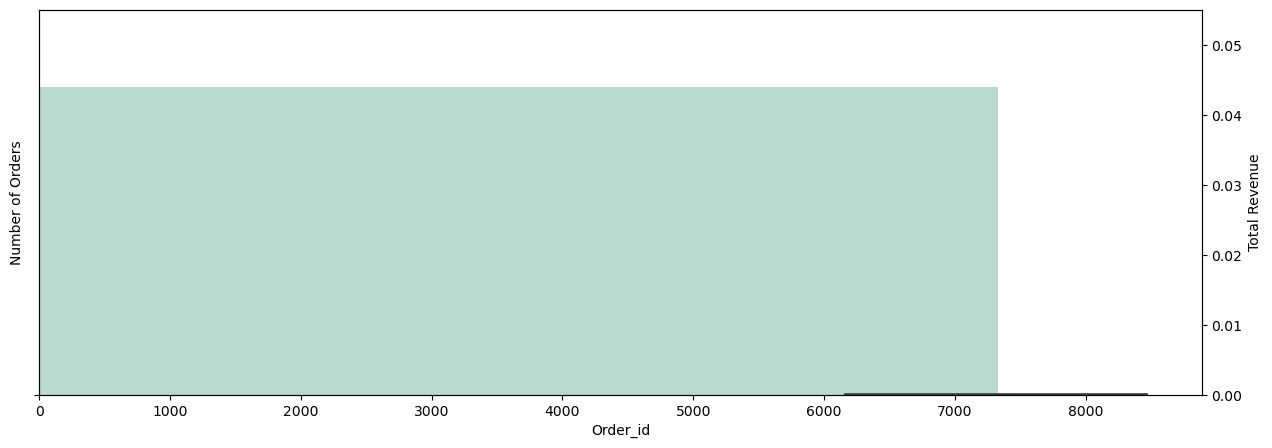

In [37]:
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(orders.groupby("Purchase_month")["Order_id"].count(), palette="Set2", alpha=0.5, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(orders.groupby("Purchase_month")["sum"].sum(), marker="o", ax=ax2)

ax1.set_ylabel('Number of Orders')
ax2.set_ylabel("Total Revenue")

# 각 축의 범위 설정
ax1.set_ylim(0, None)  # 주문 수의 y축 범위 설정, 0부터 시작하도록
ax2.set_ylim(0, None)  # 총 수익의 y축 범위 설정, 0부터 시작하도록

plt.show()


#### 요일별 주문 건수 와 판매액

In [ ]:
orders.groupby("purchase_day")["Order_id"].count().sort_values(ascending=False)

In [ ]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(15,5))
sns.barplot(orders.groupby("purchase_day")["Order_id"].count().reindex(weekday), ax=ax1, palette="Set2", alpha=0.5)

ax2 = plt.twinx()
sns.lineplot(orders.groupby("purchase_day")["sum"].sum().reindex(weekday), ax=ax2, marker = "o")

ax1.set_ylabel('Number of Orders')
ax2.set_ylabel("Total Revenue")

plt.show()

### 실제 배송 날짜와 기대 배송 날짜의 차이

In [ ]:
orders

In [ ]:
orders["delivered_customer_only_date"] = pd.to_datetime(orders["Order_delivered_customer_date"].astype(str).str.split().str[0]).dt.date